In [1]:
import cv2
import imutils
import os
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def showImages(img_mat_list):
    if isinstance(img_mat_list, np.ndarray):
        img_mat_list = [img_mat_list]

    stacked = np.hstack(img_mat_list)
    rgb_image = cv2.cvtColor(stacked, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (5 * len(img_mat_list), 4))
    plt.axis('off')
    plt.imshow(rgb_image)

In [3]:
testImages = []
for dir_entry in os.scandir("/kaggle/input/funky-images"):
    testImages.append(cv2.imread(dir_entry.path))

cv2 and imutils rotation

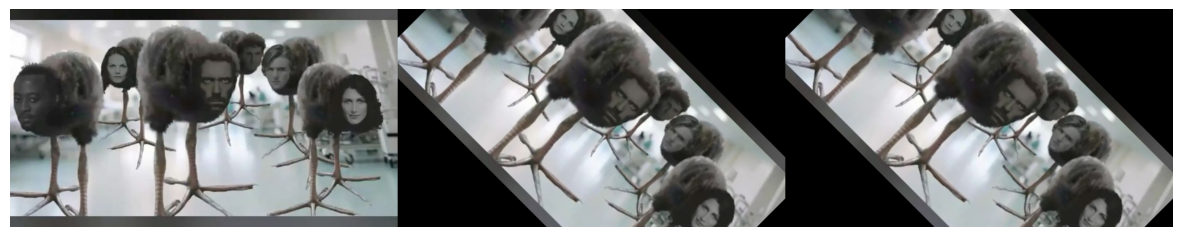

In [4]:
img = testImages[0]
shape = img.shape[:2]
center = (shape[1] // 2, shape[0] // 2)
rotationMatrix = cv2.getRotationMatrix2D(center, -45, 1) # center, angle, scale
rotatedImage = cv2.warpAffine(img, rotationMatrix, (shape[1], shape[0]))
rotatedImage2 = imutils.rotate(img, -45)
showImages([img, rotatedImage, rotatedImage2])

gaussian blur

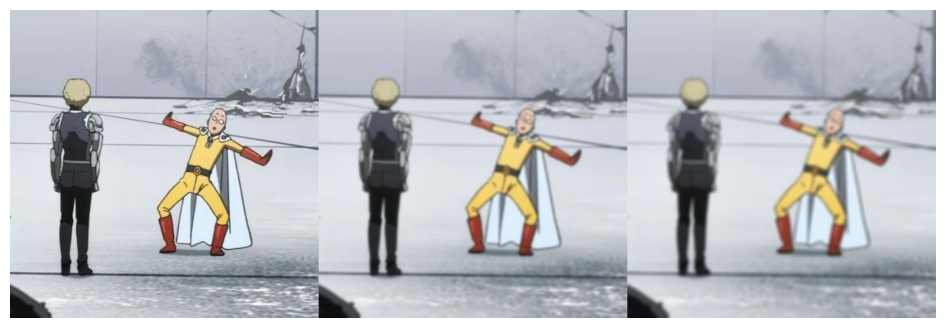

In [5]:
img = testImages[1]
blurredImage1 = cv2.GaussianBlur(img, (9,9), 0) # source, kernel size, blur std
blurredImage2 = cv2.GaussianBlur(img, (9,9), 3.0) # changed the std
showImages([img, blurredImage1, blurredImage2])

drawing

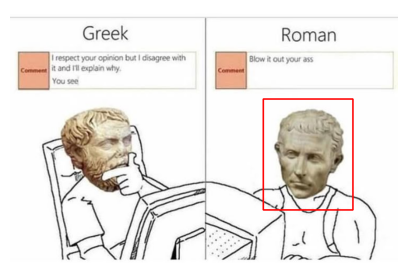

In [6]:
img = testImages[2].copy()
cv2.rectangle(img, (480, 170), (650, 380), (0, 0, 255), 2)
showImages([img])

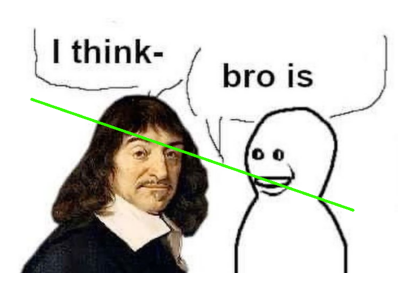

In [7]:
img = testImages[3].copy()
cv2.line(img, (40, 170), (650, 380), (0, 250, 50), 4)
showImages([img])

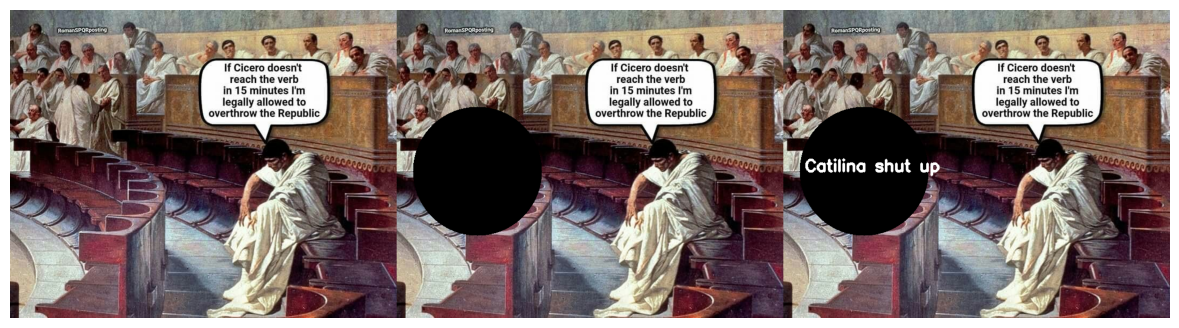

In [8]:
img = testImages[4]
imgCircle = img.copy()
cv2.circle(imgCircle, (150, 300), 120, (0, 0, 0), -1)
imgText = imgCircle.copy()
cv2.putText(imgText, 'Catilina shut up', (40, 300), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 3, cv2.LINE_8)
showImages([img, imgCircle, imgText])

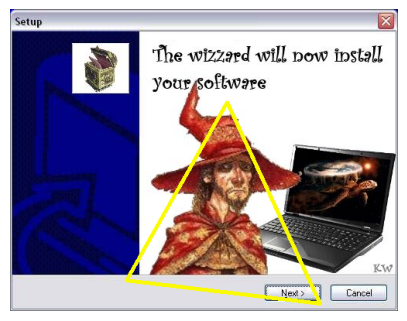

In [9]:
img = testImages[5].copy()
points = np.array([[[280, 120], [400, 380], [150, 350], [280, 120]]], dtype=np.int32)
cv2.polylines(img, points, 1, (0, 250, 250), 4)
showImages([img])